In [22]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

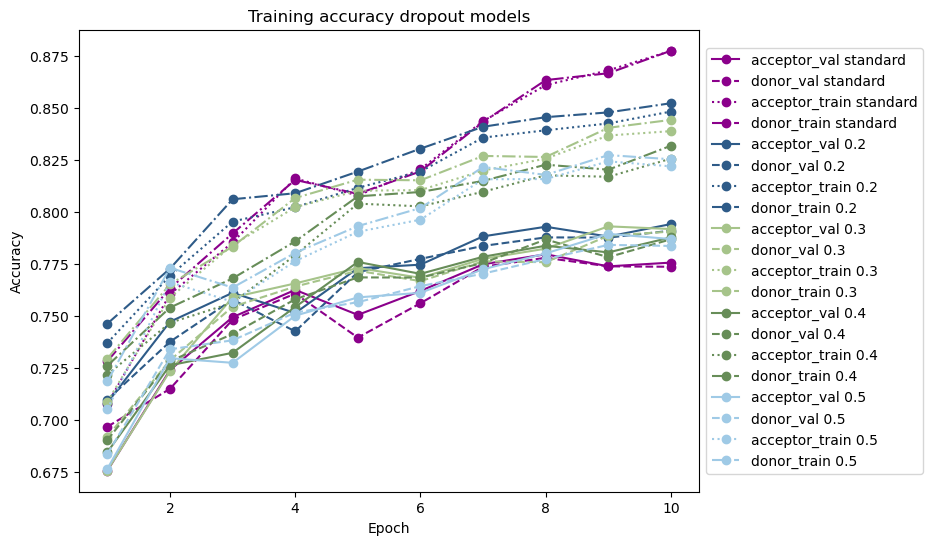

In [2]:
def plot_accuracy(file, model_num, color, ax=None):
    with open(file) as f:
        text = f.read()

    # Define a regular expression pattern to match the training set metrics
    pattern = re.compile(r'set metrics:(.*?)Learning rate:', re.DOTALL)

    # Find all matches in the text
    matches = re.findall(pattern, text)

    acceptor_val = []
    donor_val = []
    acceptor_train = []
    donor_train = []

    # Extract and print the training set metrics
    for match in matches:
        all =  match.split(':')
        acceptor_val.append(float(all[3].strip()))
        donor_val.append(float(all[14].strip()))
        acceptor_train.append(float(all[26].strip()))
        donor_train.append(float(all[37].strip()))

    x = [i for i in range(1, 11)]

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(x, acceptor_val, label='acceptor_val ' + str(model_num), color=color, marker='o')
    ax.plot(x, donor_val, label='donor_val ' + str(model_num), color=color, marker='o', linestyle='dashed')
    ax.plot(x, acceptor_train, label='acceptor_train ' + str(model_num), color=color, marker='o', linestyle='dotted')
    ax.plot(x, donor_train, label='donor_train ' + str(model_num), color=color, marker='o', linestyle='dashdot')

    return ax

# Define colors for each file
colors = ['#8B008B', '#2E5B88', '#A6C48A', '#678D58', '#9FCAE6']

# import the data
path = '../output_train_new/'
fig, ax = plt.subplots(figsize=(10, 6))

for i, color in zip(['standard', '0.2', '0.3', '0.4', '0.5'], colors):
    if i == 'standard':
        ax = plot_accuracy(path + 'SpliceAI_standard_retina1.txt', i, color, ax=ax)
    else:
        ax = plot_accuracy(path + 'SpliceAI_dropout' + i + '_retina1.txt', i, color, ax=ax)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Training accuracy dropout models')
plt.show()

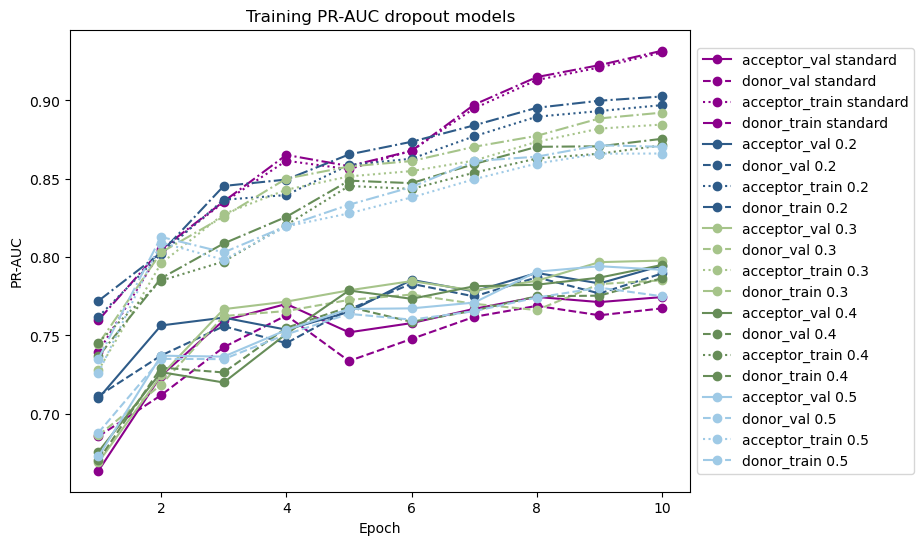

In [3]:
def plot_auc(file, model_num, color, ax=None):
    with open(file) as f:
        text = f.read()

    # Define a regular expression pattern to match the training set metrics
    pattern = re.compile(r'set metrics:(.*?)Learning rate:', re.DOTALL)

    # Find all matches in the text
    matches = re.findall(pattern, text)

    acceptor_val = []
    donor_val = []
    acceptor_train = []
    donor_train = []

    # Extract and print the training set metrics
    for match in matches:
        all =  match.split(':')
        acceptor_val.append(float(all[6].split('\t')[0].strip()))
        donor_val.append(float(all[17].split('\t')[0].strip()))
        acceptor_train.append(float(all[29].split('\t')[0].strip()))
        donor_train.append(float(all[40].split('\t')[0].strip()))

    x = [i for i in range(1, 11)]

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(x, acceptor_val, label='acceptor_val ' + str(model_num), color=color, marker='o')
    ax.plot(x, donor_val, label='donor_val ' + str(model_num), color=color, marker='o', linestyle='dashed')
    ax.plot(x, acceptor_train, label='acceptor_train ' + str(model_num), color=color, marker='o', linestyle='dotted')
    ax.plot(x, donor_train, label='donor_train ' + str(model_num), color=color, marker='o', linestyle='dashdot')

    return ax

# Define colors for each file
colors = ['#8B008B', '#2E5B88', '#A6C48A', '#678D58', '#9FCAE6']

# import the data
path = '../output_train_new/'
fig, ax = plt.subplots(figsize=(10, 6))

for i, color in zip(['standard', '0.2', '0.3', '0.4', '0.5'], colors):
    if i == 'standard':
        ax = plot_auc(path + 'SpliceAI_standard_retina1.txt', i, color, ax=ax)
    else:
        ax = plot_auc(path + 'SpliceAI_dropout' + i + '_retina1.txt', i, color, ax=ax)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Epoch')
ax.set_ylabel('PR-AUC')
ax.set_title('Training PR-AUC dropout models')
plt.show()

# Mean of all models

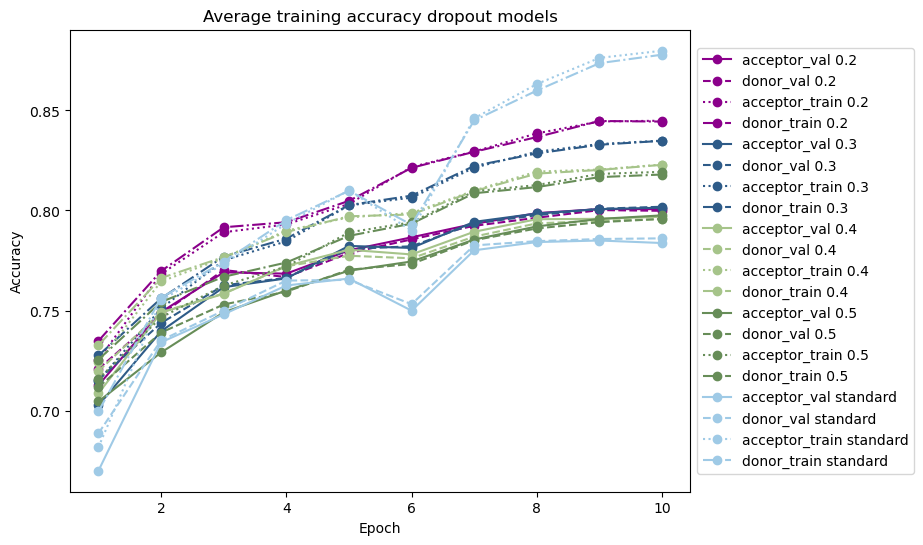

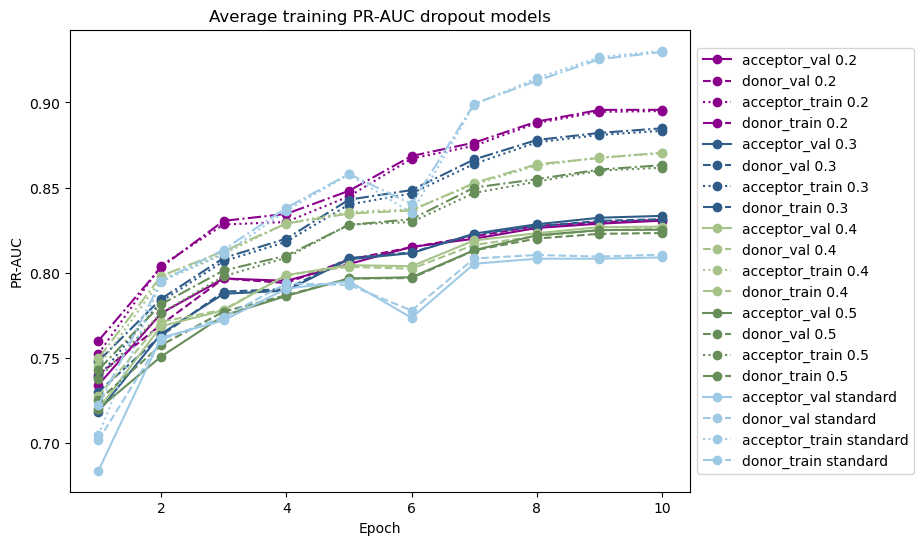

In [43]:
def get_accuracy(file):
    with open(file) as f:
        text = f.read()

    # Define a regular expression pattern to match the training set metrics
    pattern = re.compile(r'set metrics:(.*?)Learning rate:', re.DOTALL)

    # Find all matches in the text
    matches = re.findall(pattern, text)

    acceptor_val = []
    donor_val = []
    acceptor_train = []
    donor_train = []

    # Extract and print the training set metrics
    for match in matches:
        all =  match.split(':')
        acceptor_val.append(float(all[3].strip()))
        donor_val.append(float(all[14].strip()))
        acceptor_train.append(float(all[26].strip()))
        donor_train.append(float(all[37].strip()))

    return [acceptor_val, donor_val, acceptor_train, donor_train]

def get_auc(file):
    with open(file) as f:
        text = f.read()

    # Define a regular expression pattern to match the training set metrics
    pattern = re.compile(r'set metrics:(.*?)Learning rate:', re.DOTALL)

    # Find all matches in the text
    matches = re.findall(pattern, text)

    acceptor_val = []
    donor_val = []
    acceptor_train = []
    donor_train = []

    # Extract and print the training set metrics
    for match in matches:
        all =  match.split(':')
        acceptor_val.append(float(all[6].split('\t')[0].strip()))
        donor_val.append(float(all[17].split('\t')[0].strip()))
        acceptor_train.append(float(all[29].split('\t')[0].strip()))
        donor_train.append(float(all[40].split('\t')[0].strip()))

    return [acceptor_val, donor_val, acceptor_train, donor_train]


def plot_metric(acceptor_val, donor_val, acceptor_train, donor_train, model_num, color, ax=None):

    x = [i for i in range(1, 11)]

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(x, acceptor_val, label='acceptor_val ' + str(model_num), color=color, marker='o')
    ax.plot(x, donor_val, label='donor_val ' + str(model_num), color=color, marker='o', linestyle='dashed')
    ax.plot(x, acceptor_train, label='acceptor_train ' + str(model_num), color=color, marker='o', linestyle='dotted')
    ax.plot(x, donor_train, label='donor_train ' + str(model_num), color=color, marker='o', linestyle='dashdot')

    return ax

def mean_of_lists(*lists):
    # Combine elements at the same positions using zip
    grouped_elements = zip(*lists)
    # Calculate the mean for each group
    means = [sum(group) / len(group) for group in grouped_elements]
    return means

# Define colors for each file
colors = ['#8B008B', '#2E5B88', '#A6C48A', '#678D58', '#9FCAE6']

# import the data
path = '../output_train_new/'
fig, ax = plt.subplots(figsize=(10, 6))


# get the accuracy for each model
models = ['SpliceAI_dropout0.2_retina', 'SpliceAI_dropout0.3_retina', 'SpliceAI_dropout0.4_retina', 'SpliceAI_dropout0.5_retina', 'SpliceAI_standard_retina']
accuracy = []
for model in models:
    model1 = get_accuracy(path + model + str(1) + '.txt')
    model2 = get_accuracy(path + model + str(2) + '.txt')
    model3 = get_accuracy(path + model + str(3) + '.txt')
    model4 = get_accuracy(path + model + str(4) + '.txt')
    model5 = get_accuracy(path + model + str(5) + '.txt')
    
    out = []

    for i in range(len(model1)):
        out.append(mean_of_lists(model1[i], model2[i], model3[i], model4[i], model5[i]))

    accuracy.append(out)

# get the auc for each model
auc = []
for model in models:
    model1 = get_auc(path + model + str(1) + '.txt')
    model2 = get_auc(path + model + str(2) + '.txt')
    model3 = get_auc(path + model + str(3) + '.txt')
    model4 = get_auc(path + model + str(4) + '.txt')
    model5 = get_auc(path + model + str(5) + '.txt')
    
    out = []

    for i in range(len(model1)):
        out.append(mean_of_lists(model1[i], model2[i], model3[i], model4[i], model5[i]))

    auc.append(out)

for i, color, name in zip(accuracy, colors, ['0.2', '0.3', '0.4', '0.5', 'standard']):
    ax = plot_metric(i[0], i[1], i[2], i[3], name, color, ax=ax)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Average training accuracy dropout models')
plt.show()


fig, ax = plt.subplots(figsize=(10, 6))
for i, color, name in zip(auc, colors, ['0.2', '0.3', '0.4', '0.5', 'standard']):
    ax = plot_metric(i[0], i[1], i[2], i[3], name, color, ax=ax)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Epoch')
ax.set_ylabel('PR-AUC')
ax.set_title('Average training PR-AUC dropout models')
plt.show()

# Compare drop old and new

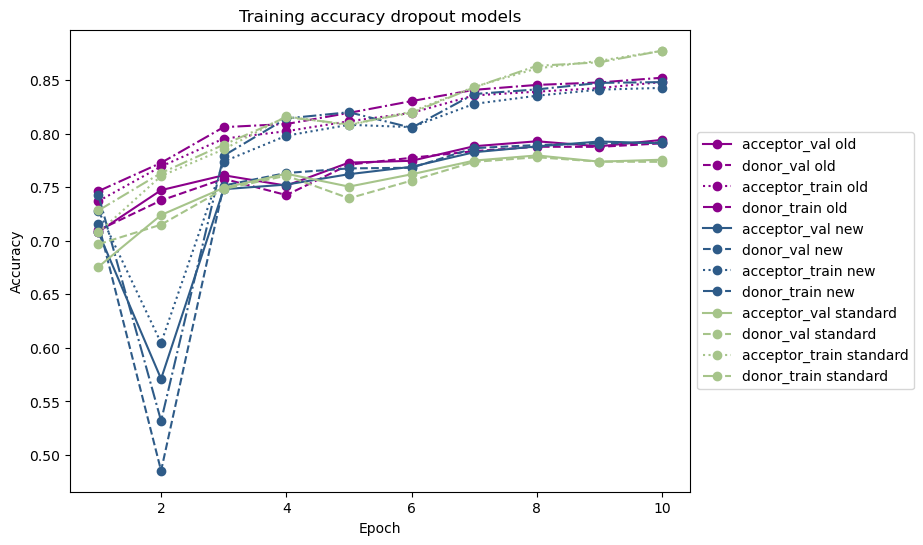

In [6]:
def plot_accuracy(file, model_num, color, ax=None):
    with open(file) as f:
        text = f.read()

    # Define a regular expression pattern to match the training set metrics
    pattern = re.compile(r'set metrics:(.*?)Learning rate:', re.DOTALL)

    # Find all matches in the text
    matches = re.findall(pattern, text)

    acceptor_val = []
    donor_val = []
    acceptor_train = []
    donor_train = []

    # Extract and print the training set metrics
    for match in matches:
        all =  match.split(':')
        acceptor_val.append(float(all[3].strip()))
        donor_val.append(float(all[14].strip()))
        acceptor_train.append(float(all[26].strip()))
        donor_train.append(float(all[37].strip()))

    x = [i for i in range(1, 11)]

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(x, acceptor_val, label='acceptor_val ' + str(model_num), color=color, marker='o')
    ax.plot(x, donor_val, label='donor_val ' + str(model_num), color=color, marker='o', linestyle='dashed')
    ax.plot(x, acceptor_train, label='acceptor_train ' + str(model_num), color=color, marker='o', linestyle='dotted')
    ax.plot(x, donor_train, label='donor_train ' + str(model_num), color=color, marker='o', linestyle='dashdot')

    return ax

# Define colors for each file
colors = ['#8B008B', '#2E5B88', '#A6C48A']

# import the data
models = ['../output_train_new/SpliceAI_dropout0.2_retina1.txt', '/Users/tabea/mnt/temporary/tabea/Retina-SpliceAI-2-paper/output_train_new/SpliceAI_dropout0.2_new_retina1.txt',
          '/Users/tabea/mnt2/Retina-SpliceAI-2/output_train_new/SpliceAI_standard_retina1.txt']
fig, ax = plt.subplots(figsize=(10, 6))

for model, color, i in zip(models, colors, ['old', 'new', 'standard']):
    ax = plot_accuracy(model, i, color, ax=ax)


# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Training accuracy dropout models')
plt.show()